In [ ]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../python')
from functions import *
from models import *
import tensorflow as tf
from livelossplot import PlotLossesKeras
os.environ["CUDA_VISIBLE_DEVICES"] = "1" # pick a number < 4 on ML4HEP; < 3 on Voltan 
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [23]:
save_folder = "mock"

if save_folder is not None: 
    os.makedirs(save_folder, exist_ok=True)

### Load data

In [42]:
file = "../gaia_data/mock_streams/gaiamock_ra156.2_dec57.5_stream_feh-1.6_v3_863.npy"
df = pd.DataFrame(np.load(file), columns = ["μ_δ", "μ_α", "δ", "α", "b-r", "g", "ϕ", "λ", "μ_ϕcosλ", "μ_λ", 'stream'])
df['α_wrapped'] = df['α'].apply(lambda x: x if x > 100 else x + 360)
df['stream'] = df['stream']/100
df['stream'] = df['stream'].astype(bool)

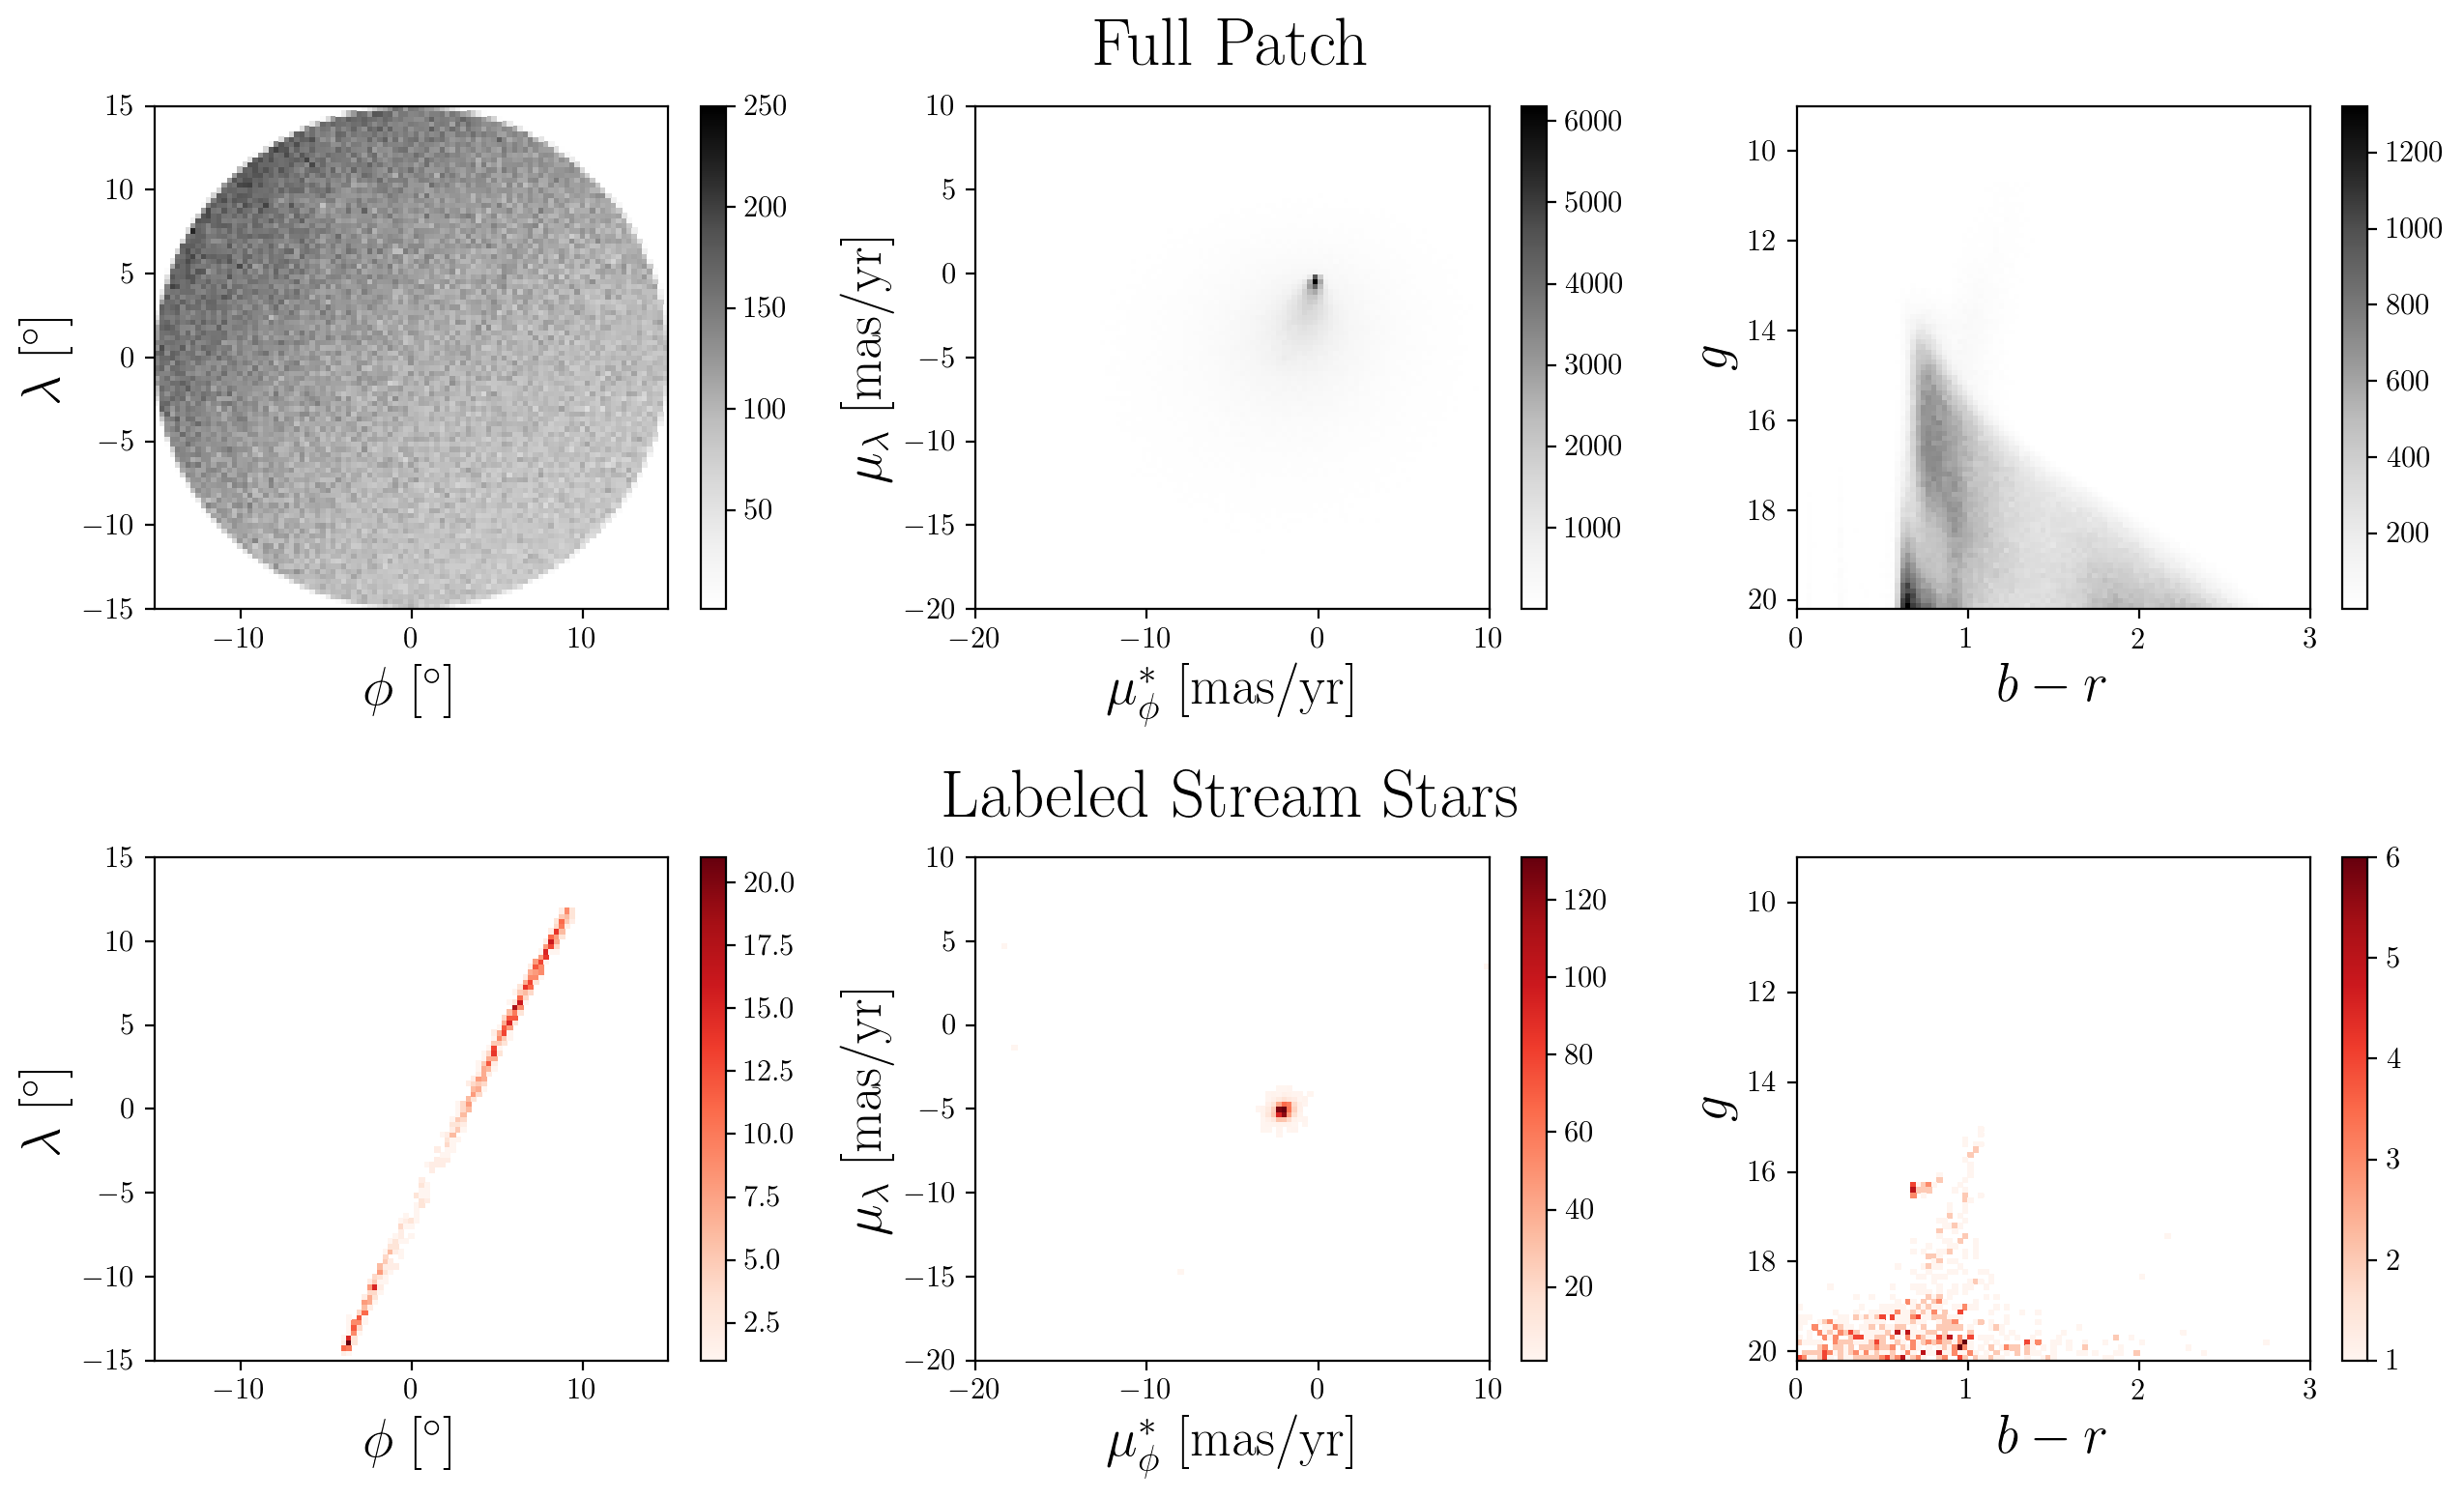

In [50]:
make_plots(df, save_folder = save_folder)

SR factor: 0.25
SB factor: 0.5
Scanning over μ_λ
Sideband region: [-7.6,-6.3) & (-3.8,-2.6]
Signal region: [-6.3,-3.8]
Total counts: SR = 175,789, SB = 171,400
Signal region has 1,124 stream and 174,665 bkg events (0.64%).
Sideband region has 1,127 stream and 346,062 bkg events (0.33%).
f_sig = 2.0X f_sideband.


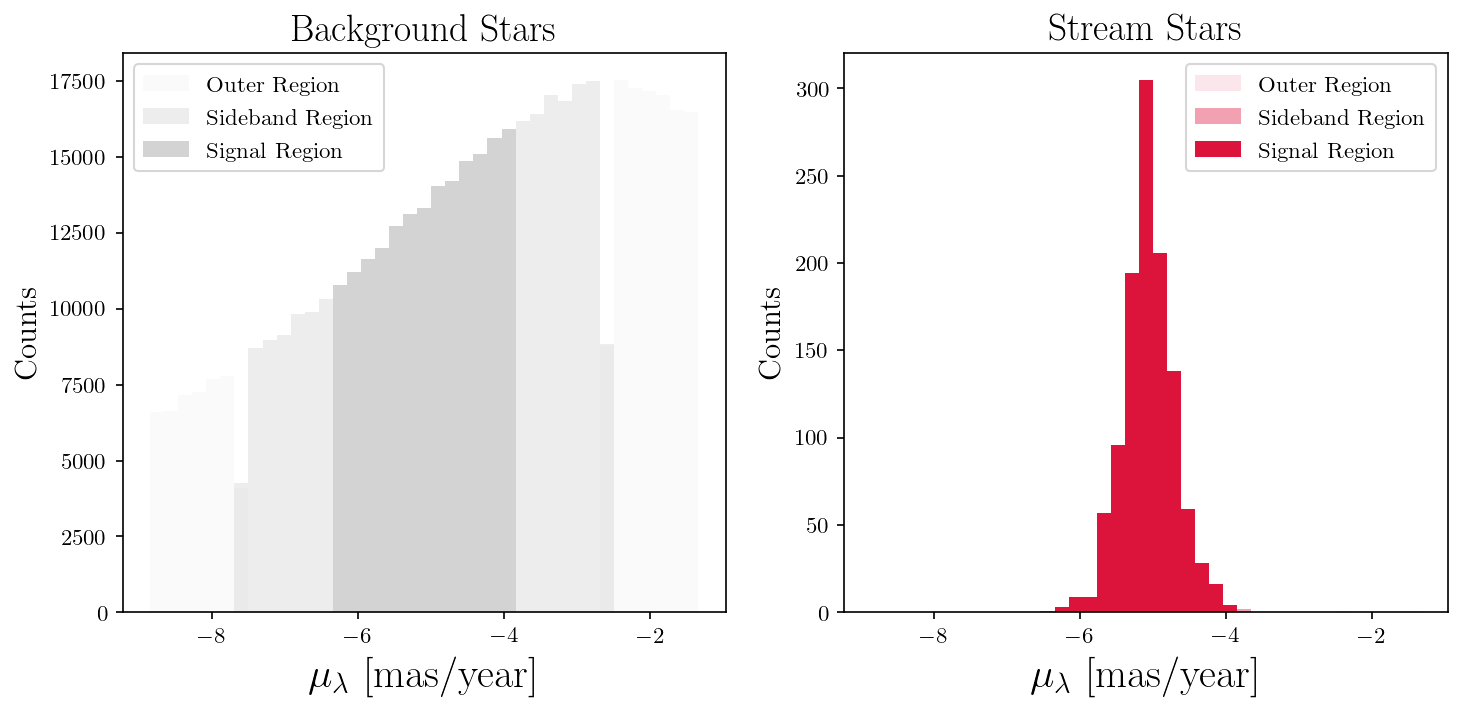

In [44]:
df_slice = signal_sideband(df, save_folder = save_folder, sr_factor=0.25, sb_factor=0.5)

# Train

Plotting results before fiducial cuts...
Plotting results after fiducial cuts...
Plotting results before fiducial cuts...
Plotting results after fiducial cuts...
Plotting results before fiducial cuts...
Plotting results after fiducial cuts...
Plotting results before fiducial cuts...
Plotting results after fiducial cuts...
Plotting results before fiducial cuts...
Plotting results after fiducial cuts...


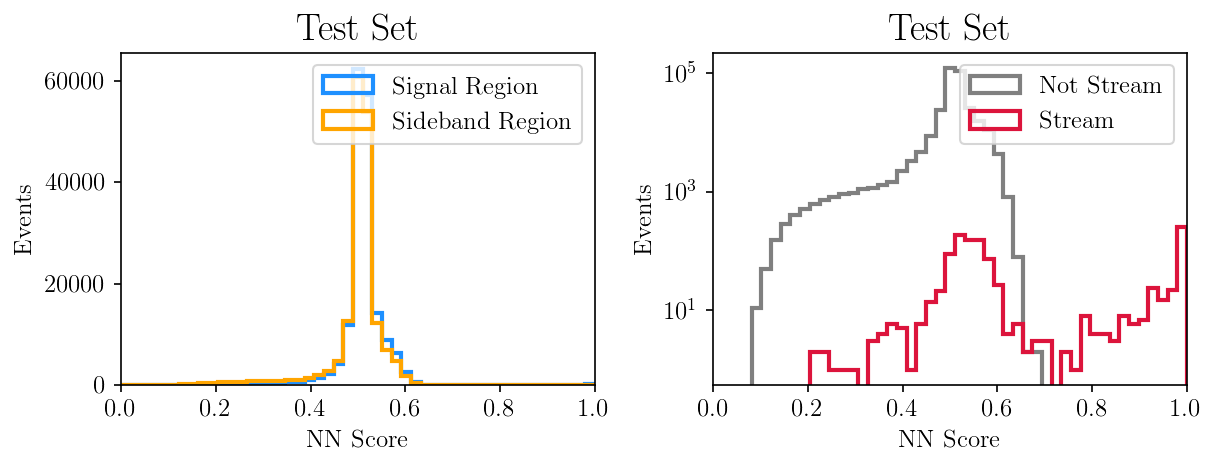

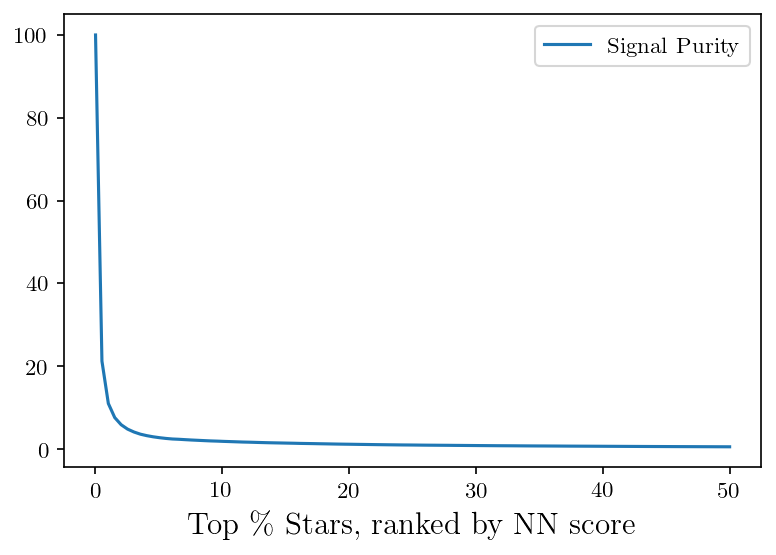

Top 50 stars: Purity = 100.0% 


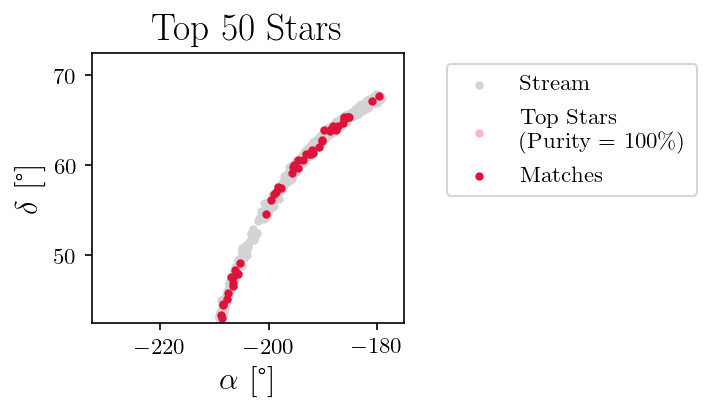

Top 100 stars: Purity = 100.0% 


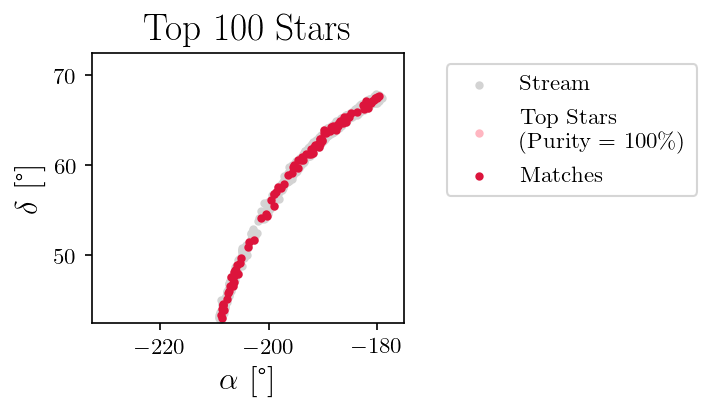

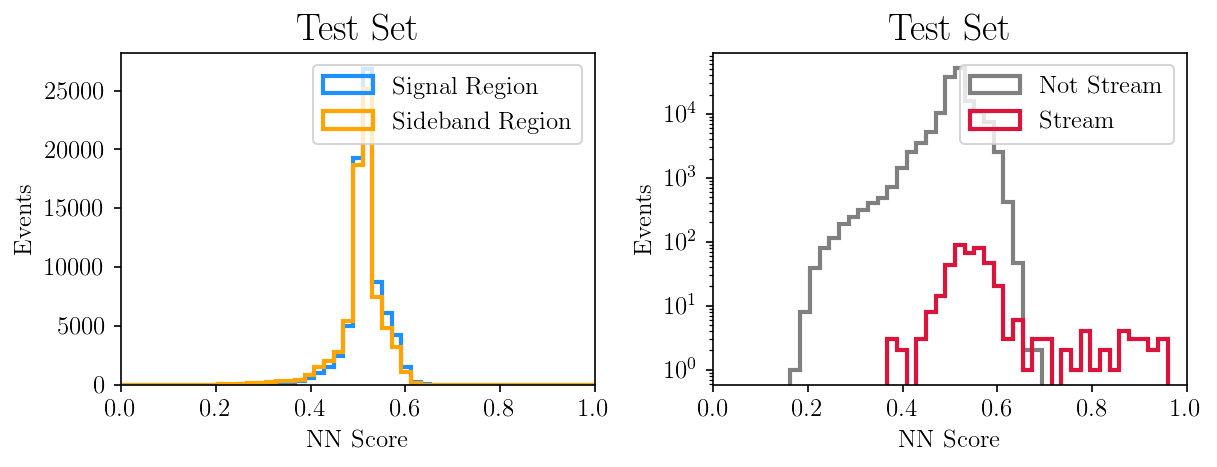

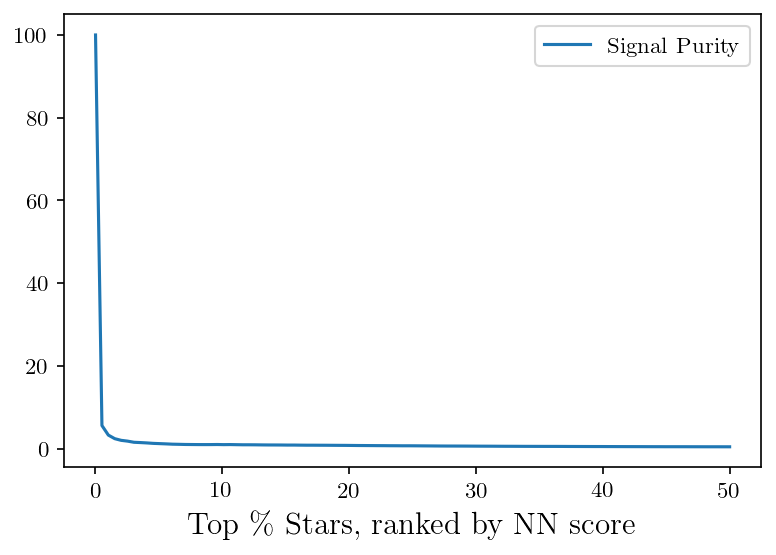

Top 50 stars: Purity = 74.0% 


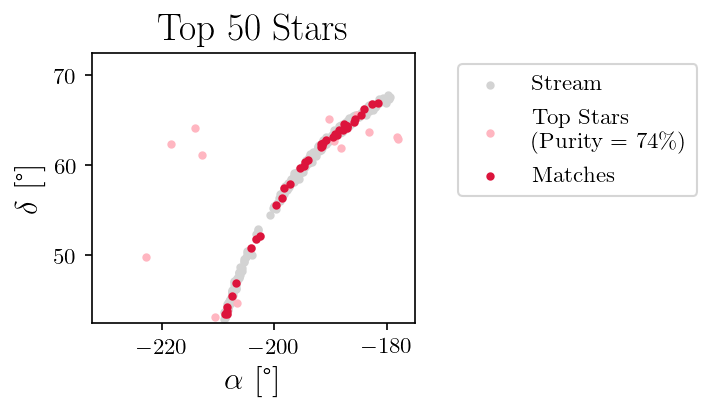

Top 100 stars: Purity = 41.0% 


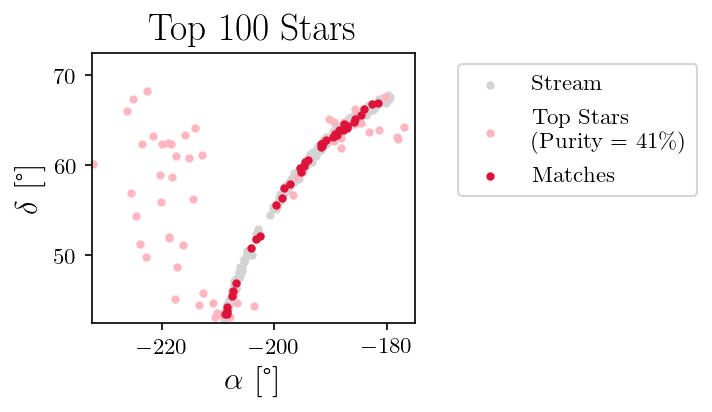

In [45]:
tf.keras.backend.clear_session()
test = train(df_slice, verbose=False, save_folder = save_folder)